<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_4/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve, validation_curve

Data
===
In this part of the course, we review a few important step that should be taken before a ML project. 
It involves the following items:

*  Data clean-up

>  
*   The missing info
*   Non-numeric values 

* Scaling

* Data reduction

>  
* Feature Selection
* PCA
* Manifold Learning
* ...

* ...


Here we load the GS data again and try to apply some of these techniques to it. 



In [3]:
## First load the data from the following url
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)

data = shuffle(data)

X = data.drop('Eat', axis=1)
Y = data['Eat']

all_features = X.columns
 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
5690,73.516695,20.980967,20.787069,17.763119,16.108955,15.332978,12.726526,12.723109,12.560612,11.001633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6234,-5.503740
300,73.516695,20.738025,19.143861,18.672492,14.932447,13.653716,13.653468,13.653173,13.653135,13.652577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26403,-9.199942
14532,73.516695,20.477194,18.658952,18.657581,13.848214,13.845358,13.654549,13.652996,13.652939,13.652591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69150,-12.490316
3917,73.516695,20.603888,20.596735,20.596393,16.057209,16.056783,16.023420,16.020802,14.139243,12.951044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48733,-14.098302
5591,73.516695,20.743234,20.724527,18.734497,18.701572,17.917421,17.850853,14.926124,14.919534,12.651024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5851,-6.838906


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 5690 to 11066
Columns: 1277 entries, 0 to Eat
dtypes: float64(1276), int64(1)
memory usage: 158.4 MB


In [5]:
print('This data has {} samples, \n {} features and \n {} data in total'.format( len(data) , len(data.columns), data.size ) )


This data has 16242 samples, 
 1277 features and 
 20741034 data in total


Data Preparation
===
Here we mainly focus on scalars and standardization of our data

## Missing data 

You can drop nan values or replace (impute) them. 
pandas offeres tools like dropna for removing data instances with nan values. 

The better alternative is to replace the missing data: Here are a list of strategies that people use:

* mean
* median 
* most frequent
* out of range => Turn into outliers

Look into the SimpleImputer from imput class in sklearn. 

## Non-numerics

If the data is of categorical type, then it should be replaced with numbers. 
One easy way is to make a set of all the possible categories and then replace each value with the index of that specific value in the set list. 
We did this for the targets in the particle identification example, where we replaced the four ids of particles with numbers 0,1,2,3.

You can also simply use the OrdinalEncoder() from preprocessing class in sklearn. 

## Standardization and scaling the data

In [0]:
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler


'''
With scaler, it is fairly simple, just tranforms your data. 
You need to do this before splitting the data, since everytime 
you apply this, it scales the input (It does different things to different inputs).
'''
X_scaled = scale(X) 


'''
With standardScaler, it is like any other tranformation in sklearn. 
'''
s_scaler = StandardScaler()
X_sscaled = s_scaler.fit_transform(X) 

'''
We can also scale such that instead of unit variance, the whole data is fit 
between 0 and 1. For that we use minmax scalers. There's an alternative for 
absvalue of the data.
'''
mm_scaler = MinMaxScaler()
mm_scaler.fit(X)
X_mmscaled = mm_scaler.transform(X) 

'''
When we have outliers, scaling could be worsen the situation, 
For these situations, it is best to use a different scaler called Robust Scaler.
'''
r_scaler = RobustScaler()
r_scaler.fit(X)
X_rscaled = r_scaler.transform(X) 

Often, the significance of scalers is more pronounced when data has features on very different scales. 
We'll come back to this. 

In [7]:
from sklearn.model_selection import cross_validate
reg = Ridge()
cv=10
scores = cross_validate(reg , X, Y, n_jobs=-1, scoring='neg_mean_squared_error' , cv=cv)
scores = pd.DataFrame(scores)
print('The result on the original data is: \n {}'.format(  scores.describe().loc[['mean','std']] ) )


The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  2.691813    0.031488   -1.144566    -0.501909
std   0.191533    0.008475    1.725543     0.004687


In [0]:
s_scores = cross_validate(reg , X_sscaled, Y, n_jobs=-1, scoring='neg_mean_squared_error' , cv=cv)
s_scores = pd.DataFrame(s_scores)
print('The result on the original data is: \n {}'.format(  s_scores.describe().loc[['mean','std']] ) )


The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean   3.27475    0.013890   -2.277049    -0.446539
std    0.11135    0.005985    4.818208     0.003904


In [0]:
mm_scores = cross_validate(reg , X_mmscaled, Y, n_jobs=-1, scoring='neg_mean_squared_error' , cv=cv)
mm_scores = pd.DataFrame(mm_scores)
print('The result on the original data is: \n {}\n'.format(  mm_scores.describe().loc[['mean','std']] ) )

r_scores = cross_validate(reg , X_rscaled, Y, n_jobs=-1, scoring='neg_mean_squared_error' , cv=cv)
r_scores = pd.DataFrame(r_scores)
print('The result on the original data is: \n {}'.format(  r_scores.describe().loc[['mean','std']] ) )


The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  2.724573    0.016162   -0.605744    -0.548376
std   0.584353    0.004885    0.025272     0.004122
The result on the original data is: 
       fit_time  score_time  test_score  train_score
mean  2.883882    0.020853   -1.240747    -0.483316
std   0.281386    0.007641    1.379802     0.005752


In [0]:
from sklearn.svm import LinearSVR
reg = LinearSVR()
cv=2

scores = cross_validate(reg , X, Y, n_jobs=-1 , cv=cv)
scores = pd.DataFrame(scores)
print('The result on the original data is: \n {}'.format(  scores.describe().loc[['mean','std']] ) )

s_scores = cross_validate(reg , X_sscaled, Y, n_jobs=-1 , cv=cv)
s_scores = pd.DataFrame(s_scores)
print('The result on the original data is: \n {}\n'.format(  s_scores.describe().loc[['mean','std']] ) )

mm_scores = cross_validate(reg , X_mmscaled, Y, n_jobs=-1 , cv=cv)
mm_scores = pd.DataFrame(mm_scores)
print('The result on the original data is: \n {}\n'.format(  mm_scores.describe().loc[['mean','std']] ) )

r_scores = cross_validate(reg , X_rscaled, Y, n_jobs=-1,  cv=cv)
r_scores = pd.DataFrame(r_scores)
print('The result on the original data is: \n {}\n'.format(  r_scores.describe().loc[['mean','std']] ) )


The result on the original data is: 
        fit_time  score_time  test_score  train_score
mean  24.790814    0.046578    0.564481     0.583107
std    0.158760    0.003242    0.261963     0.273355
The result on the original data is: 
        fit_time  score_time  test_score  train_score
mean  69.949260    0.029260    0.632964     0.939056
std    0.001719    0.014713    0.385885     0.001274

The result on the original data is: 
        fit_time  score_time  test_score  train_score
mean  12.014392    0.020903    0.939986     0.945003
std    0.459249    0.006323    0.003826     0.001362

The result on the original data is: 
        fit_time  score_time  test_score  train_score
mean  26.997427    0.019735    0.795659     0.876470
std    0.132235    0.005373    0.131394     0.006659



Data Reduction
===

## Important Features
We can use different technqiues to identify the more important features. 
Here we use a couple of those techniques

### Decision Tree and Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, random_state=0 )

In [9]:
%%time
dt_reg = DecisionTreeRegressor()

params = {'max_depth': [1,3,5, 10, 20, 50]}
opt_dt_reg = GridSearchCV(dt_reg, param_grid=params, n_jobs=-1, verbose=1)
opt_dt_reg.fit(X,Y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   45.5s finished


CPU times: user 8.93 s, sys: 390 ms, total: 9.32 s
Wall time: 54.4 s


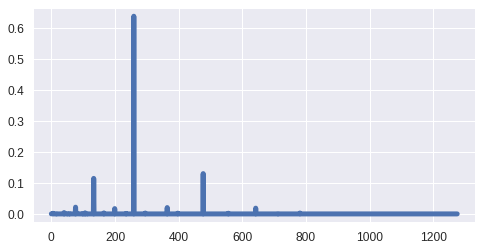

In [11]:

dt_feature_importances = opt_dt_reg.best_estimator_.feature_importances_

plt.plot(  dt_feature_importances  )
plt.show()

In [12]:
'''
Let's pick the first m more important features. 
'''
m=200

index_imfr = np.argsort( dt_feature_importances   )[:m]
important_feature_list = all_features[   index_imfr   ]

dt_reg.fit(X_train, Y_train)
print('Score without data reduction is: {}'.format(  dt_reg.score(X_test, Y_test)  ))

reduced_X_train = X_train[ important_feature_list ]
reduced_X_test = X_test[ important_feature_list ]

dt_reg.fit(reduced_X_train, Y_train)
print('Score without data reduction is: {}'.format(  dt_reg.score(reduced_X_test, Y_test)  ))


## Plot how the score changes with the number of feartures we keep. 



Score without data reduction is: 0.9965843222032758
Score without data reduction is: 0.9631049720093715


In [0]:
dt_200_scores = cross_val_score(dt_reg,  X[ important_feature_list ] , Y , cv=10, n_jobs=-1)
print(dt_200_scores)

[0.96196497 0.96274876 0.96386685 0.96448277 0.96700257 0.9619719
 0.96736675 0.96397436 0.9680196  0.9631105 ]


### Using sklearn

In [14]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(dt_reg, threshold='median')
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

Decision Tree feature selection: with 638 features.
The cv scores are:
 [0.99701234 0.99694447 0.9971586  0.99718384 0.99663881 0.99645378
 0.99697215 0.99692253 0.99686319 0.99661049]


In [0]:
model = SelectFromModel(dt_reg, max_features=100, threshold=-np.inf)
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

Decision Tree feature selection: with 100 features.
The cv scores are:
 [0.99686261 0.99674216 0.99712008 0.99686053 0.99685988 0.99712153
 0.99749723 0.99728431 0.99696552 0.99715389]


In [0]:


model = SelectFromModel(dt_reg, threshold='mean')
tr_X = model.fit_transform(X,Y)
print('Decision Tree feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(dt_reg,  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

With 18 features.
The cv scores are:
 [0.99325773 0.99359497 0.9931116  0.99351741 0.99459773 0.99426679
 0.99430907 0.99310287 0.99438323 0.99378704]


In [0]:
### With Ridge

model = SelectFromModel(Ridge() )
tr_X = model.fit_transform(X,Y)
print('Ridge feature selection: with {} features.'.format(tr_X.shape[1] ))

sm_scores = cross_val_score(Ridge(),  tr_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(sm_scores))

Ridge feature selection: with 388 features.
The cv scores are:
 [0.98834363 0.98847938 0.9886359  0.98927644 0.99073162 0.99030298
 0.98948163 0.98926519 0.98957052 0.98950002]


### Recursive Feature selection

In [0]:
%%time
from sklearn.feature_selection import RFE, RFECV

rfe = RFE(estimator=Ridge() , step=10  )
rfe.fit(X, Y)
rfs_X = rfe.transform(X)
print('Ridge feature selection: with {} features.'.format(rfs_X.shape[1] ))

rfs_scores = cross_val_score(Ridge(),  rfs_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(rfs_scores))

Ridge feature selection: with 638 features.
The cv scores are:
 [0.92913818 0.93175822 0.92430026 0.92936232 0.01762791 0.93416802
 0.93647594 0.91884961 0.92903547 0.92340594]
CPU times: user 1min 27s, sys: 13.2 s, total: 1min 40s
Wall time: 1min 1s


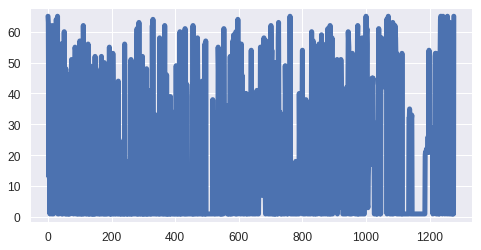

In [0]:
plt.plot(rfe.ranking_)

## Variance Threshold

In [0]:
feature_variance = X.var(axis=0)

var_threshold = feature_variance.median()
var_thsld_ind_list = [i for i in range(len( feature_variance )) if feature_variance.iloc[i] > var_threshold]
len(var_thsld_ind_list)

638

In [0]:
var_thrshld_X = X[all_features[var_thsld_ind_list]]
print("The reduced X has a shape of {}".format(var_thrshld_X.shape))

vt_scores = cross_val_score(Ridge(),  var_thrshld_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(vt_scores))

The reduced X has a shape of (16242, 638)
The cv scores are:
 [0.95459706 0.95449945 0.95009096 0.95876266 0.60367057 0.95400455
 0.95923474 0.9516424  0.95097499 0.94798321]


In [0]:
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold(threshold=var_threshold)
var_thrshld_X = VT.fit_transform(X)

print("The reduced X has a shape of {}".format(var_thrshld_X.shape))

vt_scores = cross_val_score(Ridge(),  var_thrshld_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(vt_scores))

The reduced X has a shape of (16242, 638)
The cv scores are:
 [0.95459706 0.95449945 0.95009096 0.95876266 0.60367057 0.95400455
 0.95923474 0.9516424  0.95097499 0.94798321]


## PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
pca_X = pca.fit_transform(X)

print("The reduced X has a shape of {}".format(pca_X.shape))

pca_scores = cross_val_score(Ridge(),  pca_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(pca_scores))

The reduced X has a shape of (16242, 1276)
The cv scores are:
 [0.95732331 0.54396561 0.95268506 0.95343912 0.95549755 0.95987494
 0.94733592 0.96033903 0.94285837 0.9613456 ]


In [0]:
pca = PCA(n_components=100)
pca_X = pca.fit_transform(X)

print("The reduced X has a shape of {}".format(pca_X.shape))

pca_scores = cross_val_score(Ridge(),  pca_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(pca_scores))

The reduced X has a shape of (16242, 100)
The cv scores are:
 [0.95512229 0.84334716 0.94692975 0.94705779 0.95025843 0.95554468
 0.95216048 0.95654178 0.93524693 0.9573783 ]


In [0]:
pca = PCA(n_components=25)
pca_X = pca.fit_transform(X)

print("The reduced X has a shape of {}".format(pca_X.shape))

pca_scores = cross_val_score(Ridge(),  pca_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(pca_scores))

The reduced X has a shape of (16242, 25)
The cv scores are:
 [0.86893508 0.83994759 0.85324419 0.84148699 0.85877951 0.88038538
 0.87003325 0.86661873 0.7612402  0.87429528]


In [0]:
pca = PCA(n_components=25)
pca_mm_X = pca.fit_transform(X_mmscaled )

print("The reduced X has a shape of {}".format(pca_mm_X.shape))

pca_mm_scores = cross_val_score(Ridge(),  pca_mm_X , Y , cv=10, n_jobs=-1)

print('The cv scores are:\n {}'.format(pca_mm_scores))

The reduced X has a shape of (16242, 25)
The cv scores are:
 [0.92392859 0.9219673  0.92124395 0.9245228  0.9263212  0.93622132
 0.90856261 0.92486341 0.90031409 0.93263729]


## Maniforld Learning